In [16]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from scipy import fftpack
import ccf_lightcurves as ccf_lc  ## in cross_correlation

%matplotlib inline
font_prop = font_manager.FontProperties(size=18)

In [27]:
pow_filt_file = "/Users/abigail/Dropbox/Research/power_spectra/out_ps/GX339-4HzCQPO/allps_rb_mod_linetied_sigmatied_normfree.xcm"
f = open(pow_filt_file, 'r')
f.seek(140)
big_filter = []
i = 0  # lines
j = 0  # parameters
pars = np.zeros(14)
for line in f:
    element0 = line.split()[0]
    element1 = line.split()[1]
#     print element0
    if element0 != '=':
        pars[j] = element0
        j += 1
    else:
        if "p10" in element1 or "p12" in element1 or "p13" in element1:
            pass
        else:
            j += 1
#         print element1
    if i == 16:
#         print pars
        this_filt = ccf_lc.Filter(pars)
        big_filter.append(this_filt)
        j = 0
        i = 0
    else:
        i += 1
print len(big_filter)
print len(big_filter[0].fund_filt)

26
8192


[ -1.00000000e+00   1.81587000e+09   1.07861000e+01   2.87427000e+00
   3.80766000e+10   1.13656000e+00   5.08594000e-01   2.32398000e+10
   9.13889000e-01   3.72668000e+09   4.07087000e-01   4.40100000e+00
   1.15393000e+10   2.00775000e+09]
Continuum: [  0.00000000e+00   1.74203465e+08   3.54983656e+08 ...,   1.17365304e+11
   1.17393360e+11   1.17421416e+11]
[ -1.00000000e+00   1.81587000e+09   1.07861000e+01   2.87427000e+00
   3.80766000e+10   1.13656000e+00   5.08594000e-01   2.32398000e+10
   9.13889000e-01   3.72668000e+09   4.07087000e-01   4.40100000e+00
   1.15393000e+10   2.00775000e+09]
Continuum: [  0.00000000e+00   1.74203465e+08   3.54983656e+08 ...,   1.17365304e+11
   1.17393360e+11   1.17421416e+11]
[ -1.00000000e+00   1.33614000e+08   1.07861000e+01   2.87427000e+00
   3.80766000e+10   1.13656000e+00   5.08594000e-01   2.32398000e+10
   9.13889000e-01   3.72668000e+09   4.07087000e-01   4.40100000e+00
   1.15393000e+10   2.00775000e+09]
Continuum: [  0.00000000e+00 

In [4]:
cs_file = "/Users/abigail/Dropbox/Research/lag_spectra/out_lags/GX339-4HzCQPO/GX339-4HzCQPO_160712_t64_64sec_wh_adj_cs.fits"
lo_freq=3.
hi_freq=10.
harmonic=True
# cs_file = "/Users/abigailstevens/Dropbox/Research/lag_spectra/out_lags/GX339-4HzCQPO/92428-01-04-00_160721_t64_64sec_wh_adj_cs.fits"
# ps_file = "/Users/abigailstevens/Dropbox/Research/power_spectra/out_ps/4U1608/4U1608_160906_t1_0.5sec.fits"
# lo_freq=700.
# hi_freq=850.
# harmonic=False
try:
    in_table = Table.read(cs_file)
#     in_table = Table.read(ps_file)

except IOError:
    print("\tERROR: File does not exist: %s" % cs_file)
#     print("\tERROR: File does not exist: %s" % ps_file)

print in_table


   FREQUENCY    ...   POWER_REF  
       Hz       ...              
--------------- ... -------------
            0.0 ...           0.0
0.0161681350175 ... 12072167933.1
 0.032336270035 ... 16194263426.6
0.0485044050525 ... 15018295662.7
0.0646725400701 ... 19255632533.5
0.0808406750876 ... 16798597991.8
0.0970088101051 ... 13643068290.5
 0.113176945123 ... 15443816857.7
  0.12934508014 ... 16961116694.7
 0.145513215158 ... 14660923236.8
            ... ...           ...
  66.0791678166 ... 2053460140.61
  66.0953359516 ...  1794217663.6
  66.1115040866 ... 2110595370.98
  66.1276722216 ... 1770618978.46
  66.1438403567 ... 1434813426.46
  66.1600084917 ... 1920303363.17
  66.1761766267 ... 1998012016.17
  66.1923447617 ... 1905227931.96
  66.2085128967 ... 1615158890.49
  66.2246810317 ... 1496768263.74
Length = 4097 rows


In [7]:
freq = in_table['FREQUENCY']
cs_avg = in_table['CROSS']
power_ci = in_table['POWER_CI']
power_ref = in_table['POWER_REF']
err_pow = power_ref / np.sqrt(float(in_table.meta['SEGMENTS']))
err_cs = cs_avg / np.sqrt(float(in_table.meta['SEGMENTS']))
freq = freq[1:]
cross = np.mean(cs_avg, axis=1).real
cross = cross[1:]
cross_err = np.sum(err_cs, axis=1).real
cross_err = cross_err[1:]
power_ci = power_ci[1:,]
power_ref = power_ref[1:]
err_pow = err_pow[1:]

# freq = in_table['FREQUENCY']
# power = in_table['POWER']
# err_pow = in_table['ERROR']

# freq = freq[1:]
# power = power[1:]
# err_pow = err_pow[1:]

In [10]:
# freq_mask = (freq < lo_freq) | (freq > hi_freq)
# bkgd_freq = freq[freq_mask]
# # bkgd_cross = cross[freq_mask]
# # bkgd_cross_err = cross_err[freq_mask]
# bkgd_power = power_ref[freq_mask]
# bkgd_power_err = err_pow[freq_mask]
# 
# ## Subtracting off a Gaussian for the background
# p = [1.0, 20.0, 1.0E6]
# # pbest = leastsq(gaus_weightresids, p, args=(bkgd_cross, bkgd_cross_err, bkgd_freq), full_output=1)
# pbest = leastsq(gaus_weightresids, p, args=(bkgd_power, bkgd_power_err, bkgd_freq), full_output=1)
# print pbest[0]
# best_bkgd = gaussian(freq, pbest[0])
# 
# power_ref = power_ref - best_bkgd
# print np.shape(power_ref)
# fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=(10,10))
# ax1.plot(freq, cross, 'wo', ms=2)
# ax1.plot(freq, best_bkgd,'r--', lw=3)
# # ax1.plot(freq, best_pl, 'b-', lw=2)
# ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.set_xlim(np.min(freq), 64)
# ax1.set_ylim(1E2, 1E9)
# # 	ax1.set_ylabel(r'Power $\times$ frequency (frac. rms$^{2}$ $\times$ Hz)', \
# # 		fontsize=18)
# ax1.set_ylabel(r'Cross', fontsize=20)
# ax1.tick_params(axis='y', labelsize=18, left=True, right=True,
#     labelleft=True, labelright=False)
# 
# ax2.errorbar(freq, best_resid, yerr=cross_err, linestyle=' ', ecolor='g',
#     elinewidth=2, markersize=2, marker='.')
# ax2.hlines(0, np.min(freq), np.max(freq), linestyle='dashed', lw=2)
# ax2.set_xscale('log')
# ax2.set_xlim(np.min(freq), 64)
# ax2.set_xlabel('Frequency (Hz)', fontsize=20)
# ax2.set_ylabel(r'Residuals', fontsize=20)
# ax2.tick_params(axis='y', labelsize=18, left=True, right=True,
#     labelleft=True, labelright=False)
# ax2.tick_params(axis='x', labelsize=18, bottom=True, top=True,
#     labelbottom=True, labeltop=False)

# fig.subplots_adjust(hspace=0)
# plt.savefig('cross_fit.png')
# plt.show()

In [11]:
# qpo_mod = 'L'

# ############
# ## FIT DATA
# ############

# ## Giving initial fit parameter values
# p = [4.4, 0.3, 1.0E8, 8.8, 0.7, 1.0E7, -1, 1.0E6]

# ## Optimizing using least squares method to minimize the weighted residuals
# if qpo_mod == "L":
# #     pbest = leastsq(lor_pl_weightresids, p, args=(cross, cross_err, freq), full_output=1)
#     pbest = leastsq(lor_pl_weightresids, p, args=(power_ref, err_pow, freq), full_output=1)
# else:
#     pbest = leastsq(gaus_pl_weightresids, p, args=(cross, cross_err, freq), full_output=1)

# ## Get the best parameters from the fit
# best_fit = pbest[0]
# print best_fit

# if qpo_mod == "L" or qpo_mod == "l":
#     print "\nFitting with: Lorentzian + Power law"
#     print "\tCentroid:", best_fit[0] 
#     fwhm = best_fit[1]
#     ## Fit Lorentzian to data
#     best_qpo = lorentzian(freq, best_fit)
#     best_qpo = double_lorentzian(freq, best_fit)
# #     best_resid = lor_pl_weightresids(best_fit, cross, cross_err, freq)
#     best_resid = lor_pl_weightresids(best_fit, power_ref, err_pow, freq)


# elif qpo_mod == "G" or qpo_mod == "g":
#     print "\nFitting with: Gaussian + Power law"
#     print "\tMean:", best_fit[0]
#     print "\tStd dev:", best_fit[1]
#     fwhm = 2.0 * np.sqrt(2.0 * np.log(2.0)) * best_fit[1]
#     ## Fit Gaussian to data
#     best_qpo = gaussian(freq, best_fit)
#     best_resid = gaus_pl_weightresids(best_fit, cross, cross_err, freq)
# Q = best_fit[0] / fwhm
# print "\tFWHM:", fwhm 
# print "\tQ value:", Q 

# ## Fit power law to data, for ploting
# best_pl = powerlaw(freq, best_fit)

# # chisq = np.sum(np.square(best_resid) / np.square(cross_err))
# chisq = np.sum(np.square(best_resid) / np.square(err_pow))

# # chisq = np.sum(best_resid)

# print "Chisquared: %.4g" % np.sum(chisq) 

# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
# # ax1.plot(freq, cross, 'wo', ms=2)
# ax1.plot(freq, power_ref, 'wo', ms=2)
# ax1.plot(freq, best_qpo,'r--', lw=3)
# # ax1.plot(freq, best_pl, 'b-', lw=2)
# ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.set_xlim(np.min(freq), 64)
# # 	ax1.set_ylabel(r'Power $\times$ frequency (frac. rms$^{2}$ $\times$ Hz)', \
# # 		fontsize=18)
# ax1.set_ylabel(r'Cross', fontsize=20)
# ax1.tick_params(axis='y', labelsize=18, left=True, right=True,
#     labelleft=True, labelright=False)

# # ax2.errorbar(freq, best_resid, yerr=cross_err, linestyle=' ', ecolor='g',
# #     elinewidth=2, markersize=2, marker='.')
# ax2.errorbar(freq, best_resid, yerr=err_pow, linestyle=' ', ecolor='g',
#     elinewidth=2, markersize=2, marker='.')
# ax2.hlines(0, np.min(freq), np.max(freq), linestyle='dashed', lw=2)
# ax2.set_xscale('log')
# ax2.set_xlim(np.min(freq), 64)
# ax2.set_xlabel('Frequency (Hz)', fontsize=20)
# ax2.set_ylabel(r'Residuals', fontsize=20)
# ax2.tick_params(axis='y', labelsize=18, left=True, right=True,
#     labelleft=True, labelright=False)
# ax2.tick_params(axis='x', labelsize=18, bottom=True, top=True,
#     labelbottom=True, labeltop=False)

# fig.subplots_adjust(hspace=0)
# plt.savefig('cross_fit.png')
# plt.savefig('power_fit.png')

# plt.show()

In [38]:
def geometric_rebinning(freq, values, rebin_const=1.01):
    """
    Re-bin the cross spectrum in frequency space by some re-binning constant
    (rebin_const > 1).

    Parameters
    ----------
    freq : np.array of floats
        1-D array of the Fourier frequencies.

    values : np.array of floats
        1-D array of values at each Fourier frequency, with any/arbitrary
        normalization.

    rebin_const : float
        The constant by which the data should be geometrically re-binned.

    Returns
    -------
    rb_freq : np.array of floats
        1-D array of the re-binned Fourier frequencies.

    rb_values : np.array of floats
        1-D array of the values at the re-binned Fourier frequencies, with the
        same normalization as the input cross spectrum array.
    """
    assert rebin_const >= 1.0

    ## Initialize variables
    rb_values = np.asarray([]) # List of re-binned values
    rb_freq = np.asarray([])   # List of re-binned frequencies
    real_index = 1.01          # The unrounded next index in the values
    int_index = 1              # The int of real_index, added to current_m every
                               #  iteration
    current_m = 1              # Current index in the values
    prev_m = 0                 # Previous index m

    ## Loop through the length of the values array, new bin by new bin, to
    ## compute the average value and frequency of that new geometric bin.
    while current_m < len(values):
        ## Determine the range of indices this specific geometric bin covers
        bin_range = np.absolute(current_m - prev_m)
        ## Want mean values of data points contained within one geometric bin
        bin_value = np.mean(values[prev_m:current_m])
        ## Compute the mean frequency of a geometric bin
        bin_freq = np.mean(freq[prev_m:current_m])

        ## Append values to arrays
        rb_values = np.append(rb_values, bin_value)
        rb_freq = np.append(rb_freq, bin_freq)

        ## Increment for the next iteration of the loop
        ## Since the for-loop goes from prev_m to current_m-1 (since that's how
        ## the range function and array slicing works) it's ok that we set
        ## prev_m = current_m here for the next round. This will not cause any
        ## double-counting bins or skipping bins.
        prev_m = current_m
        real_index *= rebin_const
        int_index = int(round(real_index))
        current_m += int_index
        bin_range = None
        bin_freq = None
        bin_value = None

    return rb_freq, rb_values

In [81]:
fitting_cross_spectrum = True  # Set this to False if you want to fit the ref band power spectrum

# if fitting_cross_spectrum:
# #     npn = cs_lim * freq_lim
#     npn = rb_cross * rb_freq
# else:
# #     npn = power_ref_lim * freq_lim
#     npn = rb_pow_ref * rb_freq

# freq_lim = rb_freq

Model: PowerLaw1D
Inputs: (u'x',)
Outputs: (u'y',)
Model set size: 1
Parameters:
      amplitude   x_0 alpha
    ------------- --- -----
    1124945.90499 1.2  -0.8


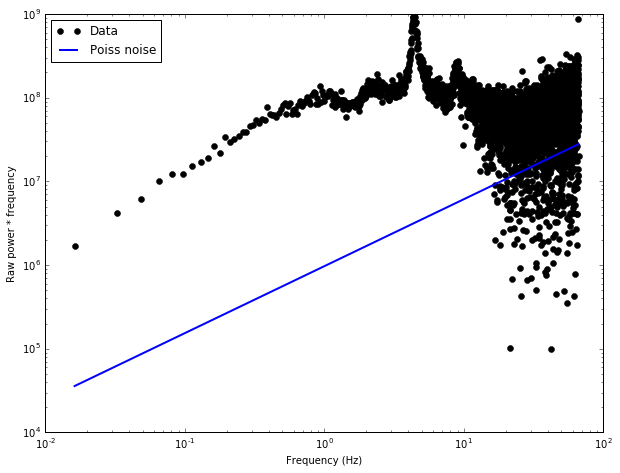

In [101]:
hi_freq_mask = freq > 25.0
hif = freq[hi_freq_mask]
cross_hif = cross[hi_freq_mask]
npn_hif = cross_hif * hif
npn_all = cross * freq

# mask1 = freq > 100.0
# f1 = freq[mask1]
# p1 = power[mask1]
# mask2 = f1 < 700.0
# f2 = f1[mask2]
# p2 = p1[mask2]
# hif = f2
# npn_hif = p2 * hif
# npn_all = power * freq
# hi_freq_mask = freq < 800
# hif = freq[hi_freq_mask]
# power_hif = power[hi_freq_mask]
# npn_hif = power_hif * hif
# npn_all = power * freq



noise_model = powerlaws.PowerLaw1D(amplitude=1E9, x_0=1.0, alpha=-1.,
                                   bounds={'alpha':(-1.2, -0.8),
                                           'x_0':(0.8, 1.2)})
# noise_model = powerlaws.PowerLaw1D(amplitude=1E-4, x_0=1.0, alpha=-1.,
#                                    bounds={'alpha':(-1.2, -0.8),
#                                            'x_0':(0.8, 1.2)})
np.random.seed(0)
fit_noise = fitting.LevMarLSQFitter()
hif_noise = fit_noise(noise_model, hif, npn_hif)
print hif_noise

plt.figure(figsize=(10, 7.5))
plt.plot(freq, npn_all, 'ko', label="Data")
plt.plot(freq, hif_noise(freq), label="Poiss noise", lw=2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Raw power * frequency")
# plt.xlim(700, 850)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.show()

In [112]:
# def tie_harmonic_centroid(model):
#     x_0_2 = 2. * model.x_0_1
#     return x_0_2

# def tie_harmonic_fwhm(model):
#     fwhm_2 = 2. * model.fwhm_1
#     return fwhm_2

@custom_model
def bbn(x, amp_1=1.0, x_0_1=0.9, fwhm_1=5.0, amp_2=1.0, x_0_2=1.4, fwhm_2=5.0, amp_3=1.0, x_0_3=4, fwhm_3=5.0):
# def bbn(x, amp_1=1.0, x_0_1=0.9, fwhm_1=5.0, amp_2=1.0, x_0_2=1.4, fwhm_2=5.0):
# def bbn(x, amp_1=1.0, x_0_1=0.9, fwhm_1=5.0):
    numerator1 = fwhm_1 / (np.pi * 2.0)
    denominator1 = (x - x_0_1) ** 2 + (0.5 * fwhm_1) ** 2
    L1 = (numerator1 / denominator1) * amp_1 * x
#     return L1
    numerator2 = fwhm_2 / (np.pi * 2.0)
    denominator2 = (x - x_0_2) ** 2 + (0.5 * fwhm_2) ** 2
    L2 = (numerator2 / denominator2) * amp_2 * x
#     return L1+L2
    numerator3 = fwhm_3 / (np.pi * 2.0)
    denominator3 = (x - x_0_3) ** 2 + (0.5 * fwhm_3) ** 2
    L3 = (numerator3 / denominator3) * amp_3 * x
    return L1+L2+L3


@custom_model
def qpo_and_harmonic(x, amp_f=1., x_0_f=3., fwhm_f=0.5, amp_h=1., fwhm_h=0.8):
    numerator1 = fwhm_f / (np.pi * 2.0)
    denominator1 = (x - x_0_f) ** 2 + (0.5 * fwhm_f) ** 2
    L1 = (numerator1 / denominator1) * amp_f * x
    numerator2 = fwhm_h / (np.pi * 2.0)
    denominator2 = (x - 2*x_0_f) ** 2 + (0.5 * fwhm_h) ** 2
    L2 = (numerator2 / denominator2) * amp_h * x
    return L1 + L2


@custom_model
def qpo_fundamental_only(x, amp_f=1., x_0_f=3., fwhm_f=0.5):
    numerator = fwhm_f / (np.pi * 2.0)
    denominator = (x - x_0_f) ** 2 + (0.5 * fwhm_f) ** 2
    L = (numerator / denominator) * amp_f * x
    return L

The relative error between two consecutive iterates is at most 0.000000
Model: bbn
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
        amp_1     x_0_1 fwhm_1     amp_2     ...    amp_3     x_0_3     fwhm_3   
    ------------- ----- ------ ------------- ... ------------ ----- -------------
    226049592.119   0.7    4.0 296060032.945 ... 636389790.66   0.6 7.94728580535


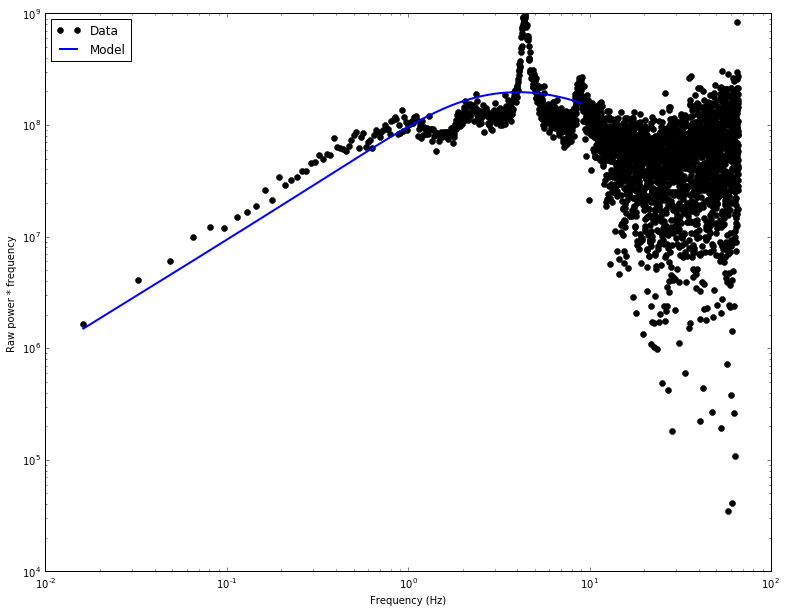

In [124]:
# freq_mask = (freq > lo_freq) & (freq < hi_freq)
freq_mask = freq < 9
power_ref_fit = power_ref[freq_mask]
cs_fit = cross[freq_mask]
freq_fit = freq[freq_mask]
# npn_fit = power_ref_fit * freq_fit - hif_noise(freq_fit)
npn_fit = cs_fit * freq_fit - hif_noise(freq_fit)

# power_ref_fit = power_ref
# cs_fit = cross
# freq_fit = freq
# npn_fit = power_ref * freq - hif_noise(freq)

noise_init = bbn(amp_1=1.0E9, x_0_1=0.1, fwhm_1=2., amp_2=1.0E9, x_0_2=1.5, fwhm_2=10., amp_3=636389790.66, x_0_3=.1, fwhm_3=7.94728580535, 
                fixed={'fwhm_3':True, 'amp_3':True})
# noise_init = bbn(amp_1=1.0E7, x_0_1=0.9, fwhm_1=6., amp_2=1.0E7, x_0_2=2.75, fwhm_2=6.)
# noise_init = bbn(amp_1=1.0E10, x_0_1=0.9, fwhm_1=2.)
noise_init.amp_1.min = 1.0E5
noise_init.amp_1.max = 1.0E10
noise_init.x_0_1.min = 0.7
noise_init.x_0_1.max = 1.5
noise_init.fwhm_1.min = 4
noise_init.fwhm_1.max = 7

noise_init.amp_2.min = 1.0E5
noise_init.amp_2.max = 5.0E10
noise_init.x_0_2.min = 1.5
noise_init.x_0_2.max = 3
noise_init.fwhm_2.min = 17
noise_init.fwhm_2.max = 21

noise_init.amp_3.min = 1.0E5
noise_init.amp_3.max = 1.0E11
noise_init.x_0_3.min = 0.01
noise_init.x_0_3.max = 0.6
# noise_init.fwhm_3.min = 4
# noise_init.fwhm_3.max = 60

if harmonic is False:
#     qpo_init = qpo_fundamental_only(amp_f=1E11, x_0_f=4.3240, fwhm_f=0.5)
#     qpo_init.amp_f.min = 1E7
#     qpo_init.amp_f.max = 1.0E13
#     qpo_init.x_0_f.min = lo_freq
#     qpo_init.x_0_f.max = hi_freq
#     qpo_init.fwhm_f.min = 0.01
#     qpo_init.fwhm_f.max = 1.0
    qpo_init = qpo_fundamental_only(amp_f=1E-1, x_0_f=820., fwhm_f=0.5)
    qpo_init.amp_f.min = 1E7
    qpo_init.amp_f.max = 1.0E15
    qpo_init.x_0_f.min = lo_freq
    qpo_init.x_0_f.max = hi_freq
    qpo_init.fwhm_f.min = 0.01
    qpo_init.fwhm_f.max = 1.0
else:
    qpo_init = qpo_and_harmonic(amp_f=1E11, x_0_f=4.3240, fwhm_f=0.5,
                                amp_h=1E10, fwhm_h=0.7)
    qpo_init.amp_f.min = 1E7
    qpo_init.amp_f.max = 1.0E15
    qpo_init.x_0_f.min = lo_freq
    qpo_init.x_0_f.max = hi_freq
    qpo_init.fwhm_f.min = 0.01
    qpo_init.fwhm_f.max = 2.0
    qpo_init.amp_h.min = 1.0E5
    qpo_init.fwhm_h.min = 0.1
    qpo_init.fwhm_h.max = 5.0

# qpo_model = noise_init + qpo_init 
qpo_model = noise_init
# qpo_model = noise_init + qpo_init + powerlaws.PowerLaw1D(amplitude=hif_noise.amplitude, x_0=hif_noise.x_0, alpha=hif_noise.alpha,
#                                    fixed={'alpha':True,'x_0':True, 'amplitude':True})

np.random.seed(0)
fit_qpo = fitting.LevMarLSQFitter()
qpo_and_noise = fit_qpo(qpo_model, freq_fit, npn_fit, maxiter=1000)

print(fit_qpo.fit_info['message'])
print(qpo_and_noise)
# print(qpo_and_noise[0])
# print(qpo_and_noise[1])
# print("Fundamental centroid:", qpo_and_noise.x_0_f_1.value)
# print("Fundamental Q:", qpo_and_noise.x_0_f_1.value / qpo_and_noise.fwhm_f_1.value)

# if harmonic is False:
#     qpo_filter_model = qpo_fundamental_only(amp_f=qpo_and_noise.amp_f_1.value,
#                                         x_0_f=qpo_and_noise.x_0_f_1.value,
#                                         fwhm_f=qpo_and_noise.fwhm_f_1.value)
# else:
#     qpo_filter_model = qpo_and_harmonic(amp_f=qpo_and_noise.amp_f_1.value,
#                                         x_0_f=qpo_and_noise.x_0_f_1.value,
#                                         fwhm_f=qpo_and_noise.fwhm_f_1.value,
#                                         amp_h=qpo_and_noise.amp_h_1.value,
#                                         fwhm_h=qpo_and_noise.fwhm_h_1.value)

#     print("Harmonic centroid:", 2. * qpo_and_noise.x_0_f_1.value)
#     print("Harmonic Q:", 2.*qpo_and_noise.x_0_f_1.value / qpo_and_noise.fwhm_f_1.value)

# temp1 = qpo_and_noise.x_0_f_1.value - qpo_and_noise.fwhm_f_1.value / 2
# temp2 = qpo_and_noise.x_0_f_1.value + qpo_and_noise.fwhm_f_1.value / 2

plt.figure(figsize=(13, 10))
plt.plot(freq, cross * freq - hif_noise(freq), 'ko', label="Data")
plt.plot(freq_fit, qpo_and_noise(freq_fit), label="Model", lw=2)
# plt.vlines(temp1, ymin=0, ymax=1.1E11, color='magenta')
# plt.vlines(temp2, ymin=0, ymax=1.1E11, color='magenta')
# if harmonic is True:
#     temp3 = 2. * qpo_and_noise.x_0_f_1.value - qpo_and_noise.fwhm_h_1.value / 2
#     temp4 = 2. * qpo_and_noise.x_0_f_1.value + qpo_and_noise.fwhm_h_1.value / 2
#     plt.vlines(temp3, ymin=0, ymax=1.1E11, color='purple')
#     plt.vlines(temp4, ymin=0, ymax=1.1E11, color='purple')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Raw power * frequency")
# plt.xlim(1, 20)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.savefig("./testing_optimal_filter.png")

In [66]:
# noise_init = powerlaws.PowerLaw1D(amplitude=1E6, x_0=1.0, alpha=-1.,
#                                   bounds={'alpha':(-1.2, 0.8),
#                                           'x_0':(-1.2, 0.8)})
# noise_init.amplitude.min = 1.0

# noise_init = models.Lorentz1D(amplitude=1E6, x_0=1.0, fwhm=20., 
#                               bounds={'amplitude': (10.0, 1.0E10),
#                                       'x_0': (0.001, lo_freq)})
# noise_init.fwhm.min = 3.0

# qpo_init = models.Lorentz1D(amplitude=1E11, x_0=4.3240, fwhm=0.4863, 
#                             bounds={'fwhm': (0.01, 1.5), 
#                                     'x_0': (lo_freq, hi_freq),
#                                     'amplitude': (1E6, 1.0E13)})

# #                             fixed={'fwhm': True})
# # print("WARNING: fwhm is frozen at 0.4863.")
# ## TODO: take FWHM from the power spectrum fit.

# another_noise_component_init = models.Lorentz1D(amplitude=1E5, x_0=0.5, fwhm=10., 
#                               bounds={'x_0': (0.001, lo_freq-1.)})
# another_noise_component_init.fwhm.min = 3.0
# another_noise_component_init.amplitude.min = 10.0

# if harmonic is False:
#     qpo_model = noise_init + qpo_init + another_noise_component_init
# else:
#     tied_parameters = {'x_0_2': tie_harmonic_centroid, 'fwhm_2': tie_harmonic_fwhm}

#     harmonic_init = models.Lorentz1D(amplitude=1E10, x_0=hi_freq-1., 
#                                      fwhm=1.0, tied=tied_parameters,
#                                      bounds={'fwhm': (0.1, 0.9),
#                                              'x_0': (lo_freq, hi_freq)})
#     harmonic_init.amplitude.min = 1.0E5
#     harmonic_init.fwhm.min = 0.0
#     qpo_model = noise_init + qpo_init + harmonic_init + another_noise_component_init
    
# np.random.seed(0)
# fit_qpo = fitting.LevMarLSQFitter()
# qpo_and_noise = fit_qpo(qpo_model, freq_lim, npn)
# print fit_qpo.fit_info['message']
# print "\n", qpo_and_noise[0]
# print "\n", qpo_and_noise[1]
# print "\n", qpo_and_noise[2]
# print "\n", qpo_and_noise[3]


# print qpo_and_noise.fwhm_1.value
# print 2*qpo_and_noise.fwhm_1.value
# print qpo_and_noise.x_0_1.value
# print 2*qpo_and_noise.x_0_1.value
# print qpo_and_noise.x_0_2.value

# Q_value_fund = qpo_and_noise.x_0_1.value / qpo_and_noise.fwhm_1.value
# Q_value_harm = qpo_and_noise.x_0_2.value / qpo_and_noise.fwhm_2.value
# print "Q values: %.2f, %.2f" % (Q_value_fund, Q_value_harm)

# temp1 = qpo_and_noise.x_0_1.value - qpo_and_noise.fwhm_1.value / 2
# temp2 = qpo_and_noise.x_0_1.value + qpo_and_noise.fwhm_1.value / 2
# temp3 = qpo_and_noise.x_0_2.value - qpo_and_noise.fwhm_2.value / 2
# temp4 = qpo_and_noise.x_0_2.value + qpo_and_noise.fwhm_2.value / 2

# plt.figure(figsize=(10,7.5))
# # if fitting_cross_spectrum:
# #     plt.plot(freq, avg_cs, 'ko', label="Data")
# # else:
# #     plt.plot(freq, power_ref * freq, 'ko', label="Data")

# # plt.plot(freq, qpo_and_noise(freq), label="Model", lw=2)

# if fitting_cross_spectrum:
#     plt.plot(rb_freq, rb_cross * rb_freq, 'ko', label="Data")
# else:
#     plt.plot(rb_freq, rb_pow_ref * rb_freq, 'ko', label="Data")

# plt.plot(rb_freq, qpo_and_noise(rb_freq), label="Model", lw=2)

# # plt.plot(freq, qpo_filter_model(freq), label="Filter", lw=2)
# plt.vlines(temp1, ymin=0, ymax=1.1E11, color='magenta')
# plt.vlines(temp2, ymin=0, ymax=1.1E11, color='magenta')
# plt.vlines(temp3, ymin=0, ymax=1.1E11, color='purple')
# plt.vlines(temp4, ymin=0, ymax=1.1E11, color='purple')
# plt.xlabel("Frequency (Hz)", fontproperties=font_prop)
# if fitting_cross_spectrum:
#     plt.ylabel(r"Cross spectrum real component", fontproperties=font_prop)
# #     plt.ylim(0, 3.E8)
#     plt.ylim()
# else:
#     plt.ylabel(r"Raw power $\times$ frequency", fontproperties=font_prop)
#     plt.ylim(0,1.3E11)
# # plt.xlim(3, 10)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0.5, 60)
# plt.legend(loc=2, fontsize=18)
# plt.savefig("./testing_optimal_filter.png")
# plt.show()

In [67]:
f1, i1 = find_nearest(freq, temp1)
f2, i2 = find_nearest(freq, temp2)
f3, i3 = find_nearest(freq, temp3)
f4, i4 = find_nearest(freq, temp4)
c1, ic1 = find_nearest(freq, qpo_and_noise.x_0_f_1)
c2, ic2 = find_nearest(freq, 2.*qpo_and_noise.x_0_f_1)
i_diff = ic2 - i3
io_diff = i4 - ic2

qpo_peaks = {}
qpo_peaks['fc'] = ic1
qpo_peaks['f1'] = i1
qpo_peaks['f2'] = i2
qpo_peaks['hc'] = ic2
qpo_peaks['h1'] = i3
qpo_peaks['h2'] = i4

print "Indices for:"
print "Fundamental centroid:", ic1
print "Fundamental FWHM bounds:", i1, i2
print "Fundamental FWHM width:", i2-i1 + 1 # including both edges
print "Harmonic centroid:", ic2
print "Harmonic FWHM bounds:", i3, i4
print "Harmonic FWHM width:", i4-i3+1 # including both edges

print "\nActual frequencies for (in Hz):"
print "Fundamental centroid: %.3f" % (c1)
print "Fundamental FWHM bounds: %.3f, %.3f"% (f1, f2)
print "Fundamental FWHM width: %.3f" % (f2-f1)
print "Harmonic centroid: %.3f" % (c2)
print "Harmonic FWHM bounds: %.3f, %.3f" % (f3, f4)
print "Harmonic FWHM width: %.3f" % (f4-f3)

Indices for:
Fundamental centroid: 392
Fundamental FWHM bounds: 392 393
Fundamental FWHM width: 2
Harmonic centroid: 786
Harmonic FWHM bounds: 783 789
Harmonic FWHM width: 7

Actual frequencies for (in Hz):
Fundamental centroid: 6.354
Fundamental FWHM bounds: 6.354, 6.370
Fundamental FWHM width: 0.016
Harmonic centroid: 12.724
Harmonic FWHM bounds: 12.676, 12.773
Harmonic FWHM width: 0.097


In [119]:
fr = fftpack.fftfreq(in_table.meta['N_BINS'], d=in_table.meta['DT'])
ref = np.arange(-in_table.meta['N_BINS']/2, in_table.meta['N_BINS']/2)
ci = np.arange(-in_table.meta['N_BINS']/2, in_table.meta['N_BINS']/2)

#     fft_data_ci[69:76] = fft_data_ref[33:40]
#     fft_data_ci[-69:-76] = fft_data_ref[-33:-40]
    
# print fr[515:569]

print np.shape(fr[515:569])
print fr[515:569][0]
print fr[515:569][-1]
print np.shape(fr[-568:-514])
print fr[-568:-514][-1]
print fr[-568:-514][0]
print "\n"
print np.shape(fr[257:284])
print fr[257:284][0]
print fr[257:284][-1]
print np.shape(fr[-283:-256])
print fr[-285:-256][-1]
print fr[-285:-256][0]

(54,)
8.32658953402
9.18350068995
(54,)
-8.32658953402
-9.18350068995


(27,)
4.1552106995
4.57558220996
(27,)
-4.1552106995
-4.60791847999
